In [ ]:
#SYED SHAHZAIB 178 
#BSCS 7B
#

In [29]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [33]:
img = cv2.imread('Pic2.jpg', cv2.IMREAD_GRAYSCALE )

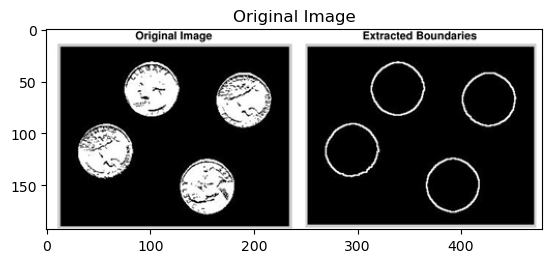

In [35]:
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.show()

In [39]:
def myMorphology(img):
    kernel = np.ones((5,5), np.uint8)
    closed_img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
    eroded_img = cv2. erode(closed_img, kernel, iterations=1)
    boundary_img = cv2.absdiff(closed_img, eroded_img)
    return boundary_img

boundary_result = myMorphology(img)

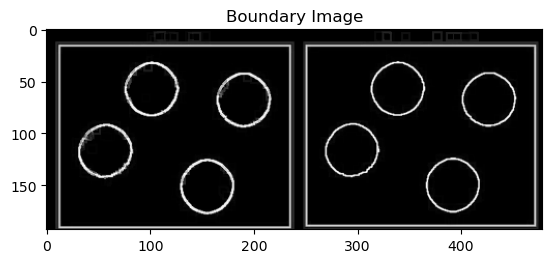

In [41]:
plt.imshow(boundary_result, cmap='gray')
plt.title('Boundary Image')
plt.show()

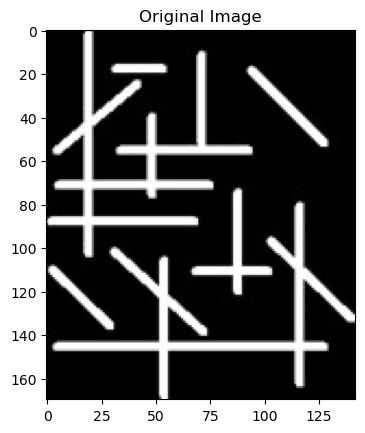

In [45]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
img = cv2.imread('shha.jpg', cv2.IMREAD_GRAYSCALE )

plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.show()

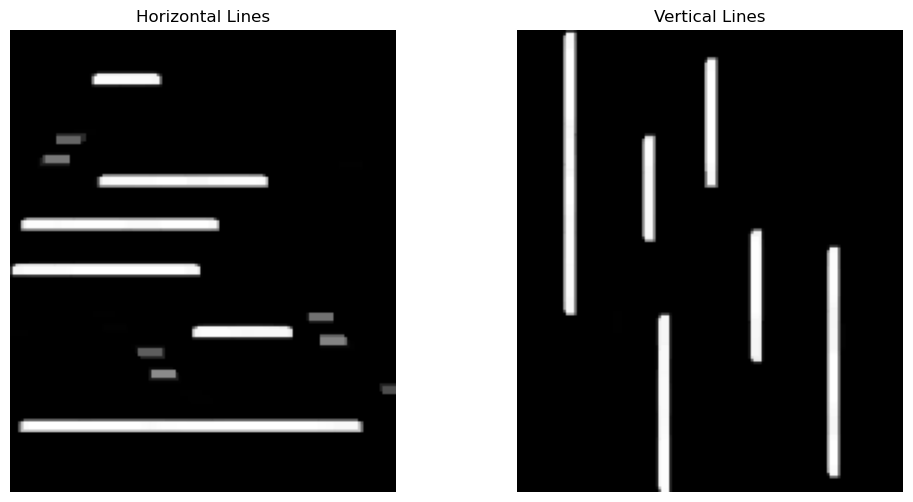

In [49]:
def separate_lines(img):

    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 3))
    vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 9))
    
   
    horizontal_opened = cv2.morphologyEx(img, cv2.MORPH_OPEN, horizontal_kernel)

    
    vertical_opened = cv2.morphologyEx(img, cv2.MORPH_OPEN, vertical_kernel)
    
    return horizontal_opened, vertical_opened


horizontal_lines, vertical_lines = separate_lines(img)


fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(horizontal_lines, cmap='gray')
axes[0].set_title('Horizontal Lines')
axes[1].imshow(vertical_lines, cmap='gray')
axes[1].set_title('Vertical Lines')
for ax in axes:
    ax.axis('off')
plt.show()

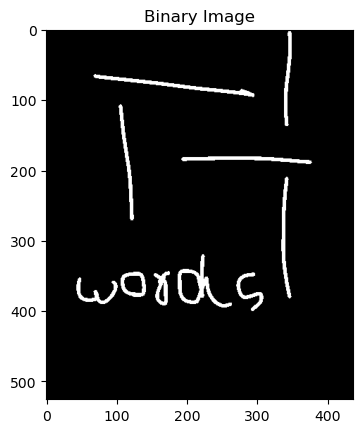

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('test.png', cv2.IMREAD_GRAYSCALE)


_, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)


plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.show()


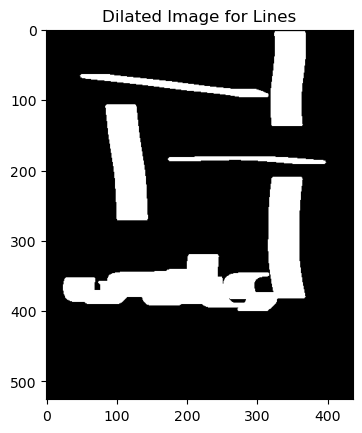

Number of lines: 5


In [4]:

horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40, 1))


dilated_image = cv2.dilate(binary_image, horizontal_kernel, iterations=1)


num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(dilated_image, connectivity=8)


plt.imshow(dilated_image, cmap='gray')
plt.title('Dilated Image for Lines')
plt.show()


num_lines = num_labels - 1  
print(f'Number of lines: {num_lines}')


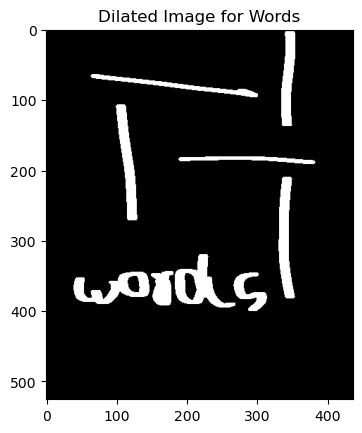

Number of words: 9


In [8]:
word_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 1))
dilated_words_image = cv2.dilate(binary_image, word_kernel, iterations=1)

num_labels_words, labels_words, stats_words, centroids_words = cv2.connectedComponentsWithStats(dilated_words_image, connectivity=8)
plt.imshow(dilated_words_image, cmap='gray')
plt.title('Dilated Image for Words')
plt.show()

num_words = num_labels_words - 1  
print(f'Number of words: {num_words}')


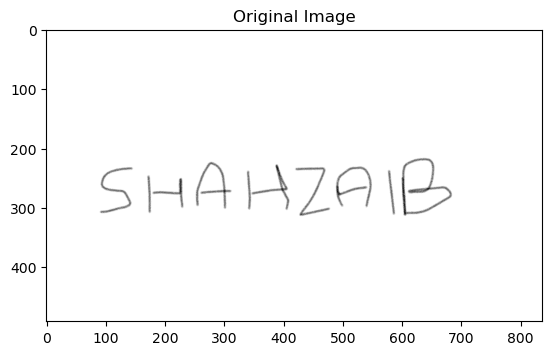

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('test2.png', cv2.IMREAD_GRAYSCALE)

plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.show()


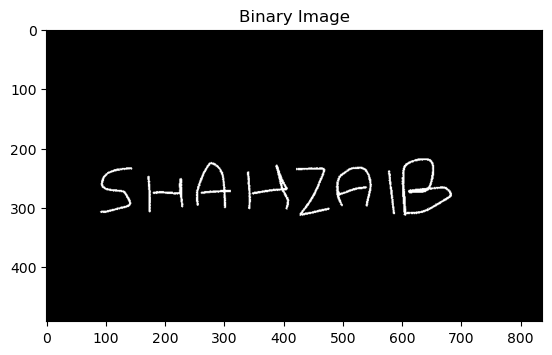

In [18]:
_, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)


plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.show()


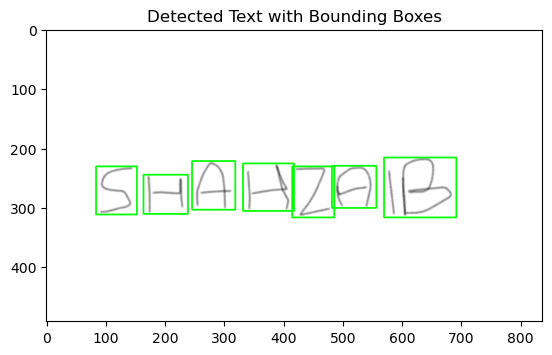

In [20]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 5))

dilated_image = cv2.dilate(binary_image, kernel, iterations=1)

contours, _ = cv2.findContours(dilated_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

bounding_box_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(bounding_box_image, (x, y), (x+w, y+h), (0, 255, 0), 2)

plt.imshow(bounding_box_image)
plt.title('Detected Text with Bounding Boxes')
plt.show()
